In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df

,age,gender,chest_pain,resting_bp,cholestrol,fasting_bs,rest_ecg,max_heart_rate,angina,oldpeak,slope,major_vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.describe()

,age,gender,chest_pain,resting_bp,cholestrol,fasting_bs,rest_ecg,max_heart_rate,angina,oldpeak,slope,major_vessels,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1025 non-null   int64  
 1   gender          1025 non-null   int64  
 2   chest_pain      1025 non-null   int64  
 3   resting_bp      1025 non-null   int64  
 4   cholestrol      1025 non-null   int64  
 5   fasting_bs      1025 non-null   int64  
 6   rest_ecg        1025 non-null   int64  
 7   max_heart_rate  1025 non-null   int64  
 8   angina          1025 non-null   int64  
 9   oldpeak         1025 non-null   float64
 10  slope           1025 non-null   int64  
 11  major_vessels   1025 non-null   int64  
 12  thal            1025 non-null   int64  
 13  target          1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#check if there is any NULL values in the dataset
df.isna().any()

age               False
gender            False
chest_pain        False
resting_bp        False
cholestrol        False
fasting_bs        False
rest_ecg          False
max_heart_rate    False
angina            False
oldpeak           False
slope             False
major_vessels     False
thal              False
target            False
dtype: bool

In [8]:
#to count the number of positive cases of heart disease and negative
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

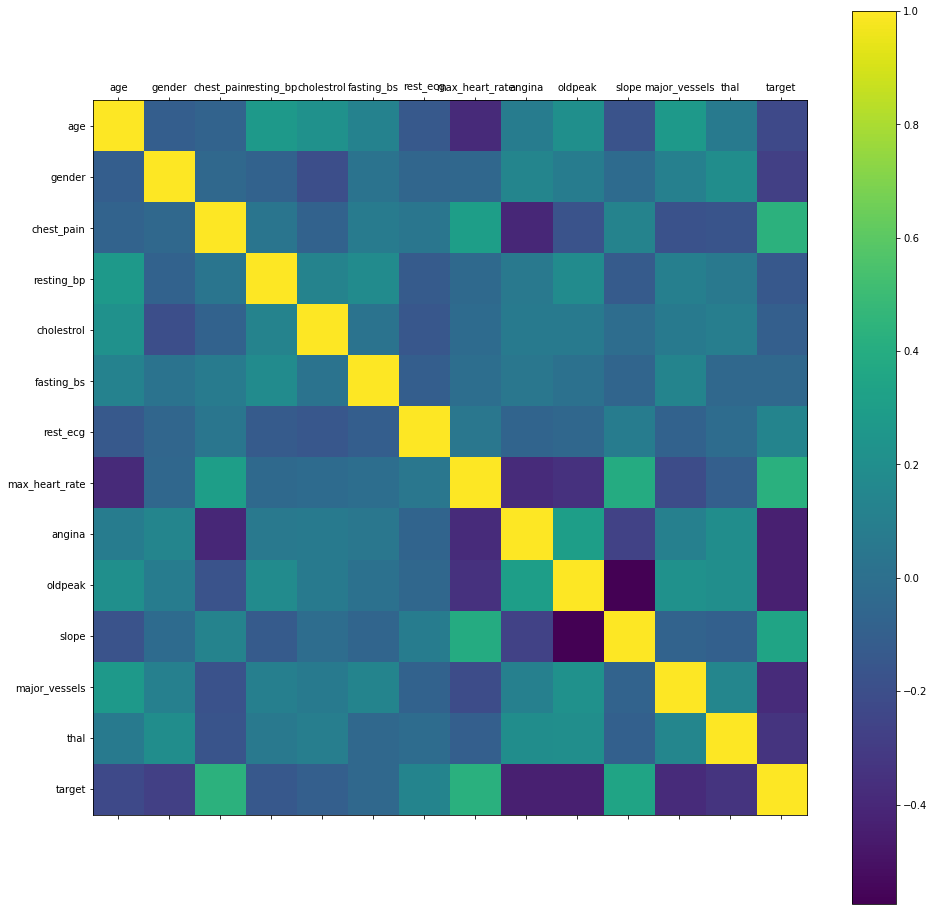

In [9]:
plt.rcParams['figure.figsize']= 16,16
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

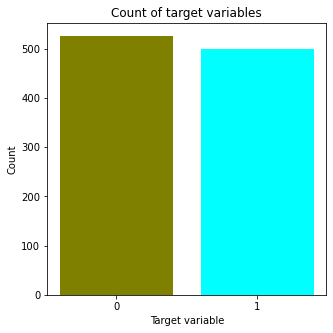

In [10]:
plt.rcParams['figure.figsize']= 5,5
plt.bar(df['target'].unique(),df['target'].value_counts(),color=['olive','cyan'])
plt.xticks([0,1])
plt.xlabel('Target variable')
plt.ylabel('Count')
plt.title('Count of target variables')
plt.show()

C:\Users\91948\AppData\Local\Temp\ipykernel_10068\606148981.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'resting_bp'}>],
       [<AxesSubplot:title={'center':'cholestrol'}>,
        <AxesSubplot:title={'center':'fasting_bs'}>,
        <AxesSubplot:title={'center':'rest_ecg'}>,
        <AxesSubplot:title={'center':'max_heart_rate'}>],
       [<AxesSubplot:title={'center':'angina'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'major_vessels'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

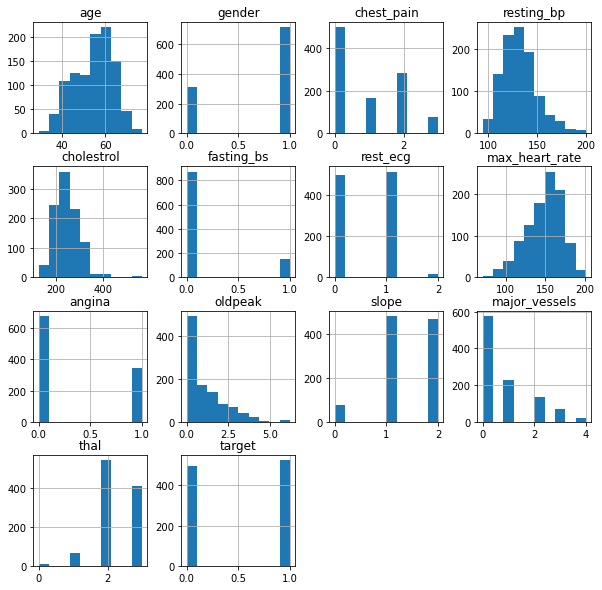

In [11]:
#to check if scaling is required
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
df.hist(ax=ax)

In [12]:
# as seen from the above graph scaling is required

In [13]:
X = df.drop(columns = 'target', axis = 1)
y = df['target']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True,random_state=42)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# EVALUATION USING LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42)

In [18]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8051948051948052

In [20]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[119  40]
 [ 20 129]]


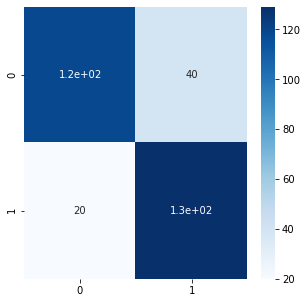

In [21]:
#plotting confusion_matrix
import seaborn as sns
cm = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [22]:
data = (62,0,0,138,294,1,1,106,0,1.9,1,3,2)
data_array = np.asarray(data)
data_reshape = data_array.reshape(1, -1)
data_standard = sc.transform(data_reshape)
prediction = model.predict(data_standard)
if(prediction[0] == 1):
    print('Heart Disease')
else:
    print('No Heart Disease')

No Heart Disease


In [23]:
report=classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



In [ ]:
# SVM

In [24]:
from sklearn.svm import SVC
model_svm=SVC(gamma='auto')
model_svm.fit(X_train,y_train)

SVC(gamma='auto')

In [25]:
y_pred_svm=model_svm.predict(X_test)

In [27]:
#EVALUATION METRICS FOR SVM
cf1_matrix=confusion_matrix(y_test,y_pred_svm)
print(cf1_matrix)

[[137  22]
 [ 12 137]]


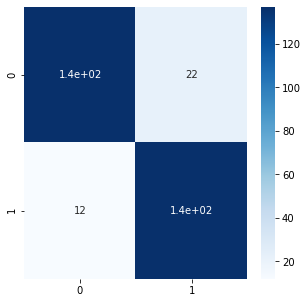

In [28]:
ax_svm=sns.heatmap(cf1_matrix,annot=True,cmap='Blues')

In [30]:
report_svm=classification_report(y_test,y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       159
           1       0.86      0.92      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



In [ ]:
#KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred_knn=classifier.predict(X_test)

In [36]:
cf_knn=confusion_matrix(y_test,y_pred_knn)
print(cf_knn)

[[130  29]
 [ 20 129]]


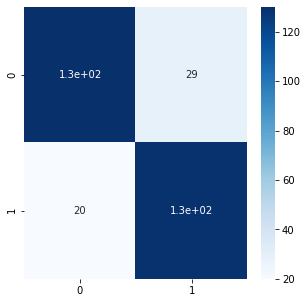

In [37]:
ax_knn=sns.heatmap(cf_knn,annot=True,cmap='Blues')

In [39]:
report_knn=classification_report(y_test,y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       159
           1       0.82      0.87      0.84       149

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308

